In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings("ignore")

# Importar todos as bases de dados (banco de dados de 2021 atualizado e 2022 até fevereiro)

df_list = []
data = []
anos_list = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
index_inicial = anos_list[0]
index_contador = 0

for x in range(len(anos_list)):
  concatenate_index = str(anos_list[0] + x)
  globals()['df%s' % concatenate_index] = pd.DataFrame(data)

  csv_string = "/content/drive/My Drive/acidentes/por_ocorrencia/datatran" + str(index_inicial) + ".csv"
  index_inicial = index_inicial + 1
  df_list.append(pd.read_csv(csv_string, sep=";", encoding="latin-1"))
  
for df in df_list:
 locals()["df"+str(anos_list[0] + index_contador)] = df
 locals()["df"+str(anos_list[0] + index_contador)]["data_inversa"] = pd.to_datetime(locals()["df"+str(anos_list[0] + index_contador)]["data_inversa"])
 locals()["df"+str(anos_list[0] + index_contador)] = locals()["df"+str(anos_list[0] + index_contador)].sort_values(by=['data_inversa'])
 index_contador = index_contador + 1

Mounted at /content/drive


In [ ]:
quantidade_removida = "Foram removidas "
anos_duplicados = []

for i in range(len(anos_list)):
  tamanho_inicial = len(locals()["df"+str(anos_list[i])].index)
  print("Qtd corrências",str(anos_list[i])+":",tamanho_inicial)

# Remover dados com o ID duplicado (Não faz sentido um banco de dados por ocorrência possuir o mesmo id)
  if locals()["df"+str(anos_list[i])]["id"].duplicated().any():
    locals()["df"+str(anos_list[i])].drop_duplicates(subset=["id"], inplace=True)
    quantidade_removida = quantidade_removida + str(tamanho_inicial-len(locals()["df"+str(anos_list[i])].index)) + " ocorrências em " + str(anos_list[i]) + ", "
  print("Qtd ocorrências ajustada",str(anos_list[i])+":",len(locals()["df"+str(anos_list[i])].index))
  print("Dados duplicados removidos em",str(anos_list[i])+":",tamanho_inicial-len(locals()["df"+str(anos_list[i])].index))

print(quantidade_removida)

Qtd corrências 2007: 127675
Qtd ocorrências ajustada 2007: 127671
Dados duplicados removidos em 2007: 4
Qtd corrências 2008: 141043
Qtd ocorrências ajustada 2008: 141038
Dados duplicados removidos em 2008: 5
Qtd corrências 2009: 158646
Qtd ocorrências ajustada 2009: 158646
Dados duplicados removidos em 2009: 0
Qtd corrências 2010: 183469
Qtd ocorrências ajustada 2010: 183465
Dados duplicados removidos em 2010: 4
Qtd corrências 2011: 192326
Qtd ocorrências ajustada 2011: 192322
Dados duplicados removidos em 2011: 4
Qtd corrências 2012: 184568
Qtd ocorrências ajustada 2012: 184561
Dados duplicados removidos em 2012: 7
Qtd corrências 2013: 186748
Qtd ocorrências ajustada 2013: 186745
Dados duplicados removidos em 2013: 3
Qtd corrências 2014: 169201
Qtd ocorrências ajustada 2014: 169197
Dados duplicados removidos em 2014: 4
Qtd corrências 2015: 122161
Qtd ocorrências ajustada 2015: 122158
Dados duplicados removidos em 2015: 3
Qtd corrências 2016: 96363
Qtd ocorrências ajustada 2016: 96362


In [ ]:
# Quantidade de Acidentes por dia a cada Ano (banco de dados de 2021 atualizado e 2022 até fevereiro)

auxilio_exec = anos_list[0] + len(anos_list) - 1          # Necessário para poder executar o código sem que plataforma reclame de variável não criada

for x in range(len(anos_list)):
  concatenate_index = str(anos_list[0] + x)
  globals()['dfAcidentes%s' % concatenate_index] = pd.DataFrame(data)

  locals()["dfAcidentes"+str(anos_list[0] + x)] = locals()["df"+str(anos_list[0] + x)]['data_inversa'].value_counts()
  locals()["dfAcidentes"+str(anos_list[0] + x)] = locals()["dfAcidentes"+str(anos_list[0] + x)].to_frame()
  locals()["dfAcidentes"+str(anos_list[0] + x)] = locals()["dfAcidentes"+str(anos_list[0] + x)].sort_index()
  if anos_list[0] + x >= anos_list[1]:
    locals()["dfAcidentes"+str(anos_list[0] + x)] = locals()["dfAcidentes"+str(anos_list[0] + x)].append(locals()["dfAcidentes"+str(anos_list[0] + x - 1)])
  elif x == len(anos_list):
    locals()["dfAcidentes"+str(anos_list[0] + x)] = locals()["dfAcidentes"+str(anos_list[0] + x)].dropna()

locals()['dfAcidentes%s' % auxilio_exec]        # Em nosso caso específico, essa variável também pode ser escrita como dfAcidentes2022

# Transformar em valores mensais utilizando o somatório
df2022AcidentesM = locals()["dfAcidentes2022"].resample(rule='M').sum()
#df2022AcidentesM = df2022AcidentesM.reset_index(level=0)
df2022AcidentesM = df2022AcidentesM.rename(columns={"index": "Date", "data_inversa": "Acidentes"})
df2022AcidentesM

,Acidentes
2007-01-31,10611
2007-02-28,9624
2007-03-31,9997
2007-04-30,10191
2007-05-31,10489
...,...
2021-10-31,5756
2021-11-30,5084
2021-12-31,5802
2022-01-31,5018


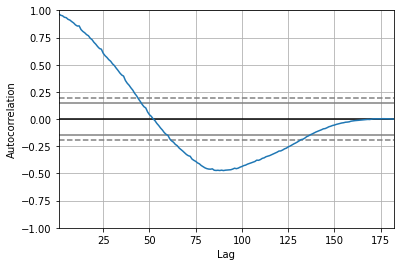

In [ ]:
# ARIMA 1.0  - Autocorrelation plot

autocorrelation_plot(df2022AcidentesM)
pyplot.show()

In [ ]:
# ARIMA 2.0  - Autocorrelation plot

## Lag são períodos de tempos que separam uma série temporal - Recorrência? (Ex: Mensal)
## Verificar a autocorrelação dos dados conforme o passar do tempo (no nosso caso no tanto de anos que queremos verificar a correlação)

import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

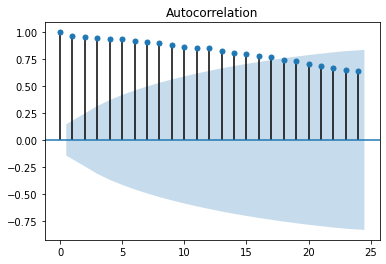

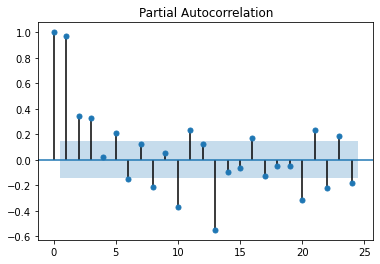

In [ ]:
# ARIMA 3.0 - Autocorrelation plot

## Utilizamos esses dois gráficos acf e pacf para verificar os valores dos parâmetros do ARIMA

plot_acf(df2022AcidentesM, lags=24)
plot_pacf(df2022AcidentesM, lags=24)
pyplot.show()

In [ ]:
# ARIMA 4.0 - Carregar o pacote

from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

In [ ]:
# ARIMA 5.0 - Definir os parâmetros p, d, q

## Primeiro valor se refere ao número de lags que irei inserir baseado nos gráficos acima
## Segundo valor se refere a aplicação de diferencicação no nosso caso será um pois nossos dados não são estacionários
## Terceiro valor se o nível de média móvel que queremos que o modelo trabalhe

modelo = ARIMA (df2022AcidentesM, order = (5,1,1))

In [ ]:
# ARIMA 6.0 - Rodar de fato o modelo e imprimir o desempenho estatístico

modelo_teste = modelo.fit()
print (modelo_teste.summary())


                             ARIMA Model Results                              
Dep. Variable:            D.Acidentes   No. Observations:                  181
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -1468.819
Method:                       css-mle   S.D. of innovations            807.365
Date:                Fri, 03 Jun 2022   AIC                           2953.639
Time:                        00:07:28   BIC                           2979.227
Sample:                    02-28-2007   HQIC                          2964.013
                         - 02-28-2022                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -28.9855     33.038     -0.877      0.382     -93.740      35.769
ar.L1.D.Acidentes    -1.0942      0.117     -9.375      0.000      -1.323      -0.865
ar.L2.D.Acidentes    -0.

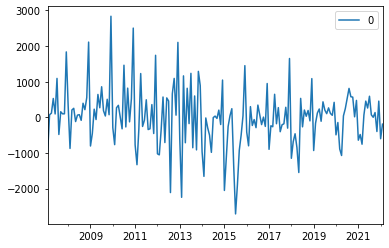

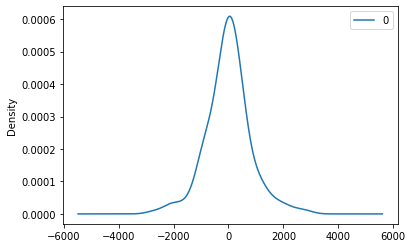

                 0
count   181.000000
mean     -2.032461
std     810.713356
min   -2709.189330
25%    -402.478822
50%      38.634985
75%     396.512540
max    2837.905592


In [ ]:
# ARIMA 7.0 - Verificar os resíduos do modelo

## Quão longe o modelo está prevendo dos casos reais?

from pandas import DataFrame
residuos = DataFrame(modelo_teste.resid)
residuos.plot()
pyplot.show()

## Usar os gráficos de densidade dos resíduos
## Verificar se há um padrão nos dados uma sazonalidade ou tendência para analisar

residuos.plot(kind= 'kde')
pyplot.show()

print(residuos.describe())  

In [ ]:
# ARIMA 8.0 - De fato realizar o treino, test

a = df2022AcidentesM.values
a = a.astype('float32')

In [ ]:
# ARIMA 9.0 - Distribuir dados de treino e tempo

treino = a[0:155]
teste = a[156:]

In [ ]:
# ARIMA 10.0 - Variavel para trabalhar com os dados (controle do treino e teste)

history = [ a for a in treino]

# lista de previsões

previsoes = list()

# Função de diferenciação (utilizada para aplicar a diferenciacao nos dados (diferença entre dados do mês do ano atual - dados do mês do ano anterior))
# Necessário para o modelo

def difference(dataset, interval = 1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset [i - interval]
        diff.append(value)
    return diff

# Função para reversão da diferenciação

def inverse_difference(history, previsao, interval = 1):
    return previsao + history[-interval]

In [ ]:
# ARIMA 11 - Importação

from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

In [ ]:
# ARIMA 12.0 - Inicio dos treinos (mes a mes) e testes

sum = 0
sum2 = 0

for t in range(len(teste)):

    #Definindo diferencial de 12 meses (ano a ano)
    meses_no_ano = 12
    diff = difference(history, meses_no_ano)

    #Criar um modelo ARIMA com os dados de history
    model = ARIMA(diff, order=(5,1,1))

    #treinando o modelo do ARIMA
    model_fit = model.fit(trend='nc', disp = 0)

    #Armazenando o valor predito em uma variavel
    valor_predito = model_fit.forecast()[0]
    valor_predito = inverse_difference(history, valor_predito, meses_no_ano)

    #Adicionando o valor predito na lista de previsoes
    previsoes.append(valor_predito)

    #Variavel recebendo o valor real do teste
    valor_real = teste[t]
    history.append(valor_real)

    #Imprimir valor predito e valor real
    print( 'Valor Predito=%.3f, Valor Esperado=%3.f' % (valor_predito, valor_real))

    #Calculo do MAE
    sum = sum + abs(valor_real - valor_predito)
    error = sum/len(teste)

    sum2 = sum2 + abs(valor_real - valor_predito)
    #print(sum2)
    #print(error)

len(teste)

Valor Predito=6766.716, Valor Esperado=5497
Valor Predito=4600.308, Valor Esperado=5467
Valor Predito=5075.984, Valor Esperado=4790
Valor Predito=5411.571, Valor Esperado=3883
Valor Predito=4495.779, Valor Esperado=4657
Valor Predito=4462.746, Valor Esperado=4734
Valor Predito=4580.451, Valor Esperado=5127
Valor Predito=5685.342, Valor Esperado=5643
Valor Predito=5282.933, Valor Esperado=5689
Valor Predito=5725.127, Valor Esperado=6120
Valor Predito=6045.906, Valor Esperado=5745
Valor Predito=5654.663, Valor Esperado=6196
Valor Predito=5798.415, Valor Esperado=5458
Valor Predito=5396.168, Valor Esperado=4978
Valor Predito=4576.697, Valor Esperado=4755
Valor Predito=3684.745, Valor Esperado=4851
Valor Predito=5299.438, Valor Esperado=5587
Valor Predito=5686.789, Valor Esperado=5318
Valor Predito=5775.327, Valor Esperado=5808
Valor Predito=6156.142, Valor Esperado=5616
Valor Predito=5790.452, Valor Esperado=5428
Valor Predito=6112.812, Valor Esperado=5756
Valor Predito=5384.100, Valor Es

26

In [ ]:
data = []

for t in range(len(previsoes)):
  for j in range(len(previsoes[t])):
    data.insert(t, previsoes[t][j])

DataFrame = pd.DataFrame(data, columns=['Previsoes'])

indexDataFrame = ['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
                  '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
                  '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01']

In [ ]:
DataFrame.index = indexDataFrame
DataFrame.index = pd.to_datetime(DataFrame.index)

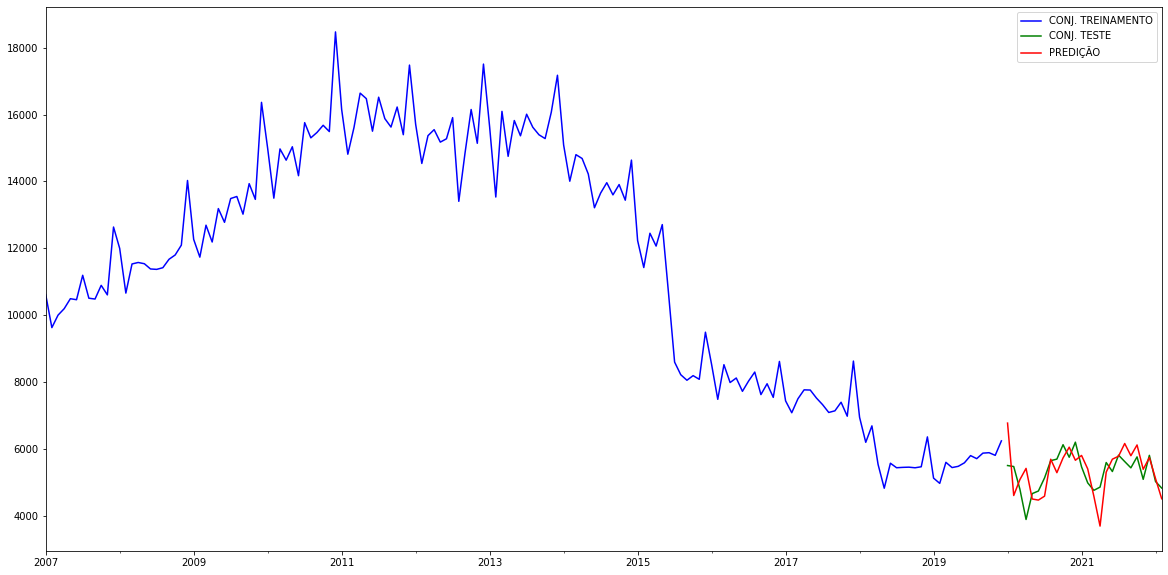

In [ ]:
train_data = df2022AcidentesM.loc[:'2019-12-31']
test_data = df2022AcidentesM.loc['2020-01-01':]

train_data["Acidentes"].plot(legend=True,label="CONJ. TREINAMENTO",figsize=(20,10), color='blue', grid=None)
test_data["Acidentes"].plot(legend=True,label="CONJ. TESTE", color='green')
DataFrame["Previsoes"].plot(legend=True,label="PREDIÇÃO", color='red')

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_data["Acidentes"], DataFrame["Previsoes"])

440.0856427212741